In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics 

In [2]:
pyber_ride_df = pd.read_csv('Resources/PyBer_ride_data.csv')
pyber_ride_df.head()

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34


<AxesSubplot:xlabel='Month'>

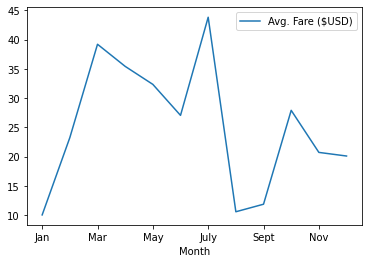

In [3]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")

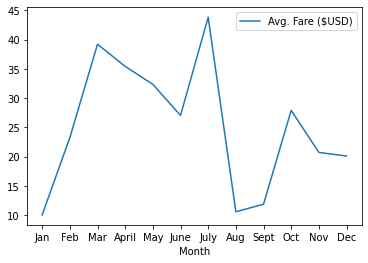

In [4]:
#We can adjust the x-ticks to show all the months by editing our code to look like this:

# Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]
# Plot the data.
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
plt.xticks(tick_locations, pyber_ride_df["Month"])
plt.show()

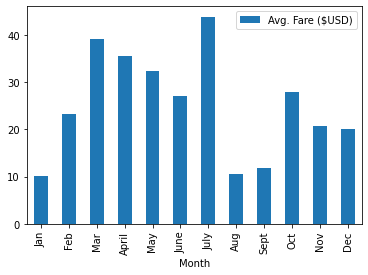

In [5]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind='bar')
plt.show()

## skill drill

Using the data from the PyBer ride DataFrame, create a bar chart with the following annotations and characteristics:

    Add error bars.
    Add caps to the error bars.
    Change the color of the bars to sky blue.
    Rotate the labels on the x-axis to horizontal.
    Set the y-axis increment to every $5.

Your chart should look similar to this:

In [6]:
stdev = statistics.stdev(pyber_ride_df['Avg. Fare ($USD)'])
stdev

11.208367917035753

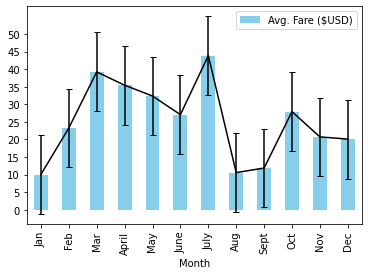

In [7]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind='bar', color='skyblue')
plt.errorbar(pyber_ride_df['Month'], pyber_ride_df['Avg. Fare ($USD)'], capsize=3,yerr=stdev,color='black')
plt.yticks(np.arange(0, 51, step=5.0))
plt.show()

## 5.2.1 Import and Inspect CSV Files

In [8]:
 # Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

Inspect the Data

Before we do any analysis, we will inspect the data and answer the following questions:

    How many columns and rows are there?
    What types of data are present?
    Is the data readable or does it need to be converted in some way?

If you open the city_data.csv file, you will see three columns: city, driver_count, and type. Here's a snapshot of the first ten rows of data in this file:

The first 10 rows of the city_data CSV file



It would be foolish to start messing around with such a large dataset without knowing exactly what you're trying to get out of it. So you and Omar have a head-to-head to clarify the process and outcomes for this project. You come up with the following list of steps and deliverables:

    Import your data into a Pandas DataFrame.
    Merge your DataFrames.
    Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
    Determine the mean, median, and mode for the following:
        The total number of rides for each city type.
        The average fares for each city type.
        The total number of drivers for each city type.
    Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
        The number of rides for each city type.
        The fares for each city type.
        The number of drivers for each city type.
    Create a pie chart that visualizes each of the following data for each city type:
        The percent of total fares.
        The percent of total rides.
        The percent of total drivers.

Omar has approved the project scope. It's time to get to work!


In [9]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [10]:
ride_data_df.head()
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64



To get the name of each column and the number of rows that are not null, we can use the df.count() method.

Another option is to use df.isnull().sum() method chaining.

To get the data types of each column, we use the dtypes on the DataFrame.

In [11]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

Merge DataFrames

Before we merge the DataFrames, let's review each DataFrame.

The columns in the city_data_df DataFrame are:

    city
    driver_count
    type

The columns in the ride_data_df are:

    city
    date
    fare
    ride_id




rewind

When we merge two DataFrames, we merge on a column with the same data, and the same column name, in both DataFrames. We use the following syntax to do that:

new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

We may have to merge the DataFrames using the how= parameter either left, right, inner, or outer depending how we want to merge the DataFrames. The default is inner.


In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


Omar has asked you to create a bubble chart that showcases the average fare versus the total number of rides with bubble si+ze based on the average number of drivers for each city type: urban, suburban, and rural.

For the bubble chart, we will need to plot the following:

    The average fare for each type of city on the y-axis
    The total number of rides for each type of city on the x-axis
    Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city


In [16]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## 5.3.2 Get the Number of Rides for Each City Type

## 5.3.4 Get the Average Number of Drivers for Each City Type

In [18]:
y_axis_urban = urban_cities_df.groupby('city').mean()['fare']
x_axis_urban = urban_cities_df.groupby('city').count()['ride_id']
marker_urban = urban_cities_df.groupby('city').mean()['driver_count']

y_axis_suburban = suburban_cities_df.groupby('city').mean()['fare']
x_axis_suburban = suburban_cities_df.groupby('city').count()['ride_id']
marker_suburban = suburban_cities_df.groupby('city').mean()['driver_count']

y_axis_rural = rural_cities_df.groupby('city').mean()['fare']
x_axis_rural = rural_cities_df.groupby('city').count()['ride_id']
marker_rural = rural_cities_df.groupby('city').mean()['driver_count']

## 5.3.5 Create Bubble Charts

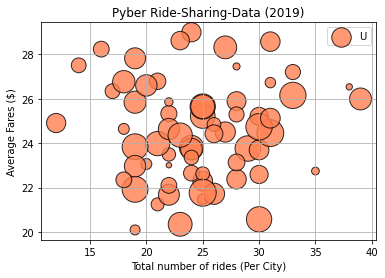

In [19]:
plt.scatter(x_axis_urban, y_axis_urban, s=marker_urban*10, 
            alpha=0.8, linewidths=1, edgecolor = 'black', 
            label='Urban', c='coral')
#plt.scatter(x_axis_suburban, y_axis_suburban, s=marker_suburban, alpha=0.5, edgecolor = 'black')
#plt.scatter(x_axis_rural, y_axis_rural, s=marker_rural, alpha=0.5, edgecolor = 'black')
plt.title('Pyber Ride-Sharing-Data (2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fares ($)')
plt.grid(True)
# Add the legend.
plt.legend('Urban')

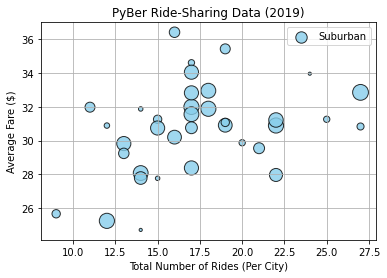

In [20]:
# Build the scatter plots for suburban cities.
plt.scatter(x_axis_suburban,
      y_axis_suburban,
      s=10*marker_suburban, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

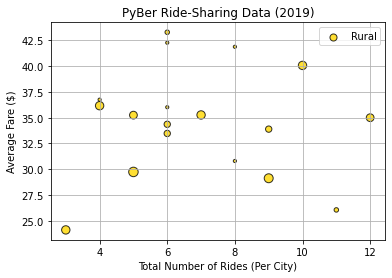

In [21]:
# Build the scatter plots for rural cities.
plt.scatter(x_axis_rural,
      y_axis_rural,
      s=10*marker_rural, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

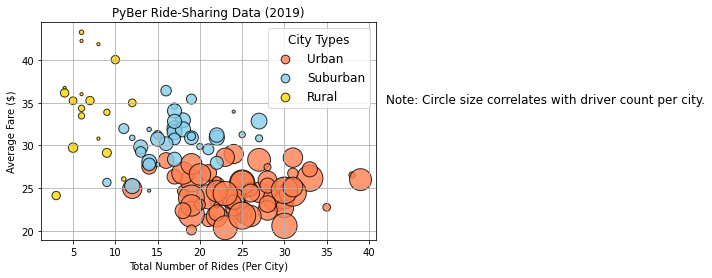

In [22]:
plt.scatter(x_axis_urban, y_axis_urban, s=marker_urban*10, 
            alpha=0.8, linewidths=1, edgecolor = 'black', 
            label='Urban', c='coral')
plt.scatter(x_axis_suburban,
      y_axis_suburban,
      s=10*marker_suburban, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.scatter(x_axis_rural,
      y_axis_rural,
      s=10*marker_rural, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

In [23]:
# Save the figure.
plt.savefig("analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>

## 5.4.1 Summary Statistics for Number of Rides by City Type

he old adage "There are many ways to skin a cat" comes to mind when getting the summary statistics. We'll use and compare the following three ways to calculate the summary statistics:

    The Pandas describe() function on the DataFrame or Series.
    The Pandas mean(), median(), and mode() methods on a Series.
    The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.

rewind

The measures of central tendency refer to the tendency of data to be toward the middle of the dataset. The three key measures of central tendency are the mean, median, and mode.


In [24]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [25]:
urban_fare_avg = urban_cities_df.groupby('city').mean()['fare']
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
urban_driver_count_avg = urban_cities_df.groupby('city').mean()['driver_count']

suburban_fare_avg = suburban_cities_df.groupby('city').mean()['fare']
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
suburban_driver_count_avg = suburban_cities_df.groupby('city').mean()['driver_count']

rural_fare_avg = rural_cities_df.groupby('city').mean()['fare']
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']
rural__driver_count_avg = rural_cities_df.groupby('city').mean()['driver_count']

In [26]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [27]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [28]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

FINDING

If we compare the average number of rides between each city type, we'll notice that the average number of rides in the rural cities is about 3.5 and 2.5 times lower than urban and suburban cities, respectively.


In [29]:
urban_ride_count.median()

24.0

In [30]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [31]:
suburban_ride_count.mode()

0    17
dtype: int64

## NumPy mean() and median() Functions and SciPy mode() Function

In [32]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [33]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [34]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17]), count=array([7]))

In [35]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6]), count=array([5]))

## 5.4.2 Summary Statistics for the Fare by City Type

In [36]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]


urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

Now we can calculate the mean, median, and mode for the urban_fares Series. To get the mean and median, we'll use the NumPy mean and median functions; to get the mode, we'll use the SciPy statistics mode function, sts.mode(). Using this mode function returns how many times the mode appears in the dataset.

Add the following code to a new cell and run the cell.

In [37]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [38]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [39]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


## 5.4.3 Summary Statistics for the Number of Drivers by City Type

In [40]:
# Get the fares for the urban cities.
urban_driver_count = urban_cities_df["driver_count"]
suburban_driver_count = suburban_cities_df["driver_count"]
rural_driver_count = rural_cities_df["driver_count"]
suburban_driver_count.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [41]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean fare price for urban trips is ${mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median fare price for urban trips is ${median_suburban_driver_count:.2f}.")

mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f"The mode fare price for urban trips is {mode_suburban_driver_count}.")

The mean fare price for urban trips is $13.71.
The median fare price for urban trips is $16.00.
The mode fare price for urban trips is ModeResult(mode=array([20]), count=array([79])).


In [42]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean fare price for urban trips is ${mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_driver_count)
print(f"The median fare price for urban trips is ${median_urban_driver_count:.2f}.")

mode_urban_driver_count = sts.mode(urban_driver_count)
print(f"The mode fare price for urban trips is {mode_urban_driver_count}.")

The mean fare price for urban trips is $36.68.
The median fare price for urban trips is $37.00.
The mode fare price for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [43]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean fare price for urban trips is ${mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_driver_count)
print(f"The median fare price for urban trips is ${median_rural_driver_count:.2f}.")

mode_rural_driver_count = sts.mode(rural_driver_count)
print(f"The mode fare price for urban trips is {mode_rural_driver_count}.")

The mean fare price for urban trips is $4.30.
The median fare price for urban trips is $4.00.
The mode fare price for urban trips is ModeResult(mode=array([1]), count=array([32])).


## 5.4.4 Create Box-and-Whisker Plots

## Box-and-Whisker Plots for Ride Count Data

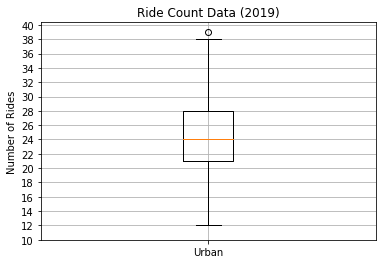

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [44]:
# Create a box-and-whisker plot for the urban cities ride count.
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=["Urban"])

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

urban_ride_count.describe()

skill drill

Calculate the summary statistics with box-and-whisker plots on the number of suburban and rural rides.


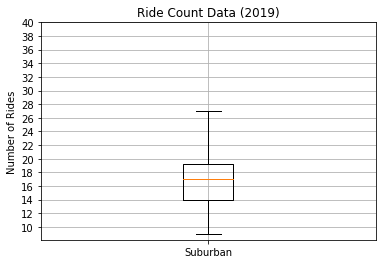

In [45]:
# Create a box-and-whisker plot for the urban cities ride count.
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=["Suburban"])
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [46]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

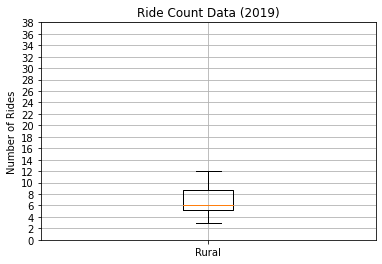

In [47]:
# Create a box-and-whisker plot for the urban cities ride count.
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=["Rural"])
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 40, step=2.0))
ax.grid()
plt.show()

In [48]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

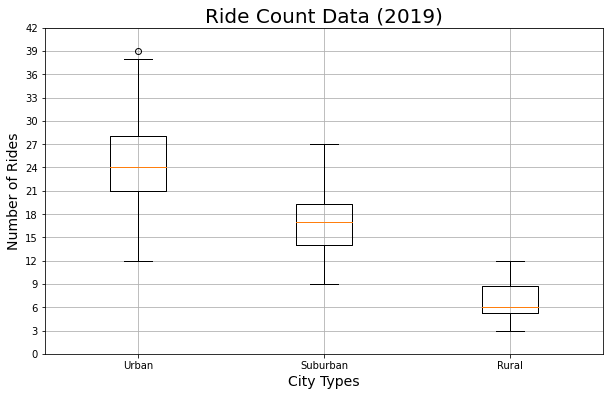

In [49]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

FINDING

There is one outlier in the urban ride count data. Also, the average number of rides in the rural cities is about 4- and 3.5-times lower per city than the urban and suburban cities, respectively.


In [50]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Box-and-Whisker Plots for Ride Fare Data

Next, let's create box-and-whisker plots for the ride fare data with summary statistics.

For the fare data, we will use the urban_fares Series we created earlier. Add the following code to the new cell:

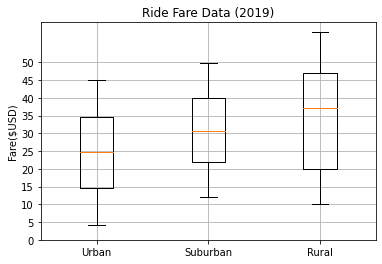

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [51]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots()
plot_values  = [urban_fares,suburban_fares,rural_fares]
ax.boxplot(plot_values, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()
print("Summary Statistics")
urban_fares.describe()

FINDING

From the combined box-and-whisker plots, we see that there are no outliers. However, the average fare for rides in the rural cities is about $11 and $5 more per ride than the urban and suburban cities, respectively. Why do you think there is such a big difference? By looking at the number of riders for each city, can you get a sense of the overall revenue?


## Box-and-Whisker Plots for Driver Count Data

We're getting really good at creating box-and-whisker plots! We need to do one last set of box-and-whisker plots. Let's create a box-and-whisker plot for the driver count data with summary statistics.

For the driver count data, we'll use the urban_drivers Series we created earlier. Add the following code to a new cell:

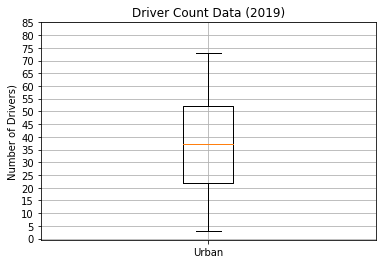

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [52]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_driver_count,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_driver_count.describe()

skill drill

Using the code for the box-and-whisker plots for the urban drivers, create box-and-whisker plots for the suburban_drivers and the rural_drivers Series with summary statistics.
End of text box.
skill drill

Create a box-and-whisker plot that has all three city types' driver count data in one box-and-whisker plot that looks similar to the following image. Save this combined box-and-whisker plot as Fig4.png in your "analysis" folder.

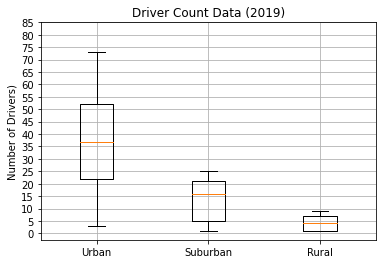

In [53]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots()
plots_values = [urban_driver_count, suburban_driver_count, rural_driver_count]
ax.boxplot(plots_values,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()


## 5.5.1 Get the Percentage of Fares for Each City Type 

As you are working on the final pieces of your presentation, you hear from Sasha that V. Isualize has a habit of asking presenters for alternate visualizations in meetings, and you are going to be ready with all the possibilities. You know pie charts aren't as common, but they are a good way to show percentages. So you get to work on creating a pie chart that showcases the percentage of fares for each type of city.

To showcase the percentage of the overall fares for each type of city, where each pie wedge will represent the percentage of total fares for each city type, the pie chart should look like this.

"Percentage of Fares for each type of City"

In [54]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [59]:
fare_type_count = pyber_data_df.groupby('type').sum()['fare']

total_fare = pyber_data_df['fare'].sum()

type_percents = fare_type_count / total_fare * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

## 5.5.2 Pie Chart for the Percentage of Fares by City Type

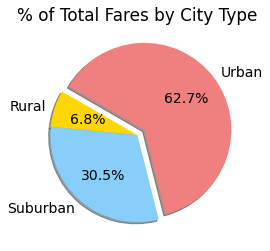

In [63]:

plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

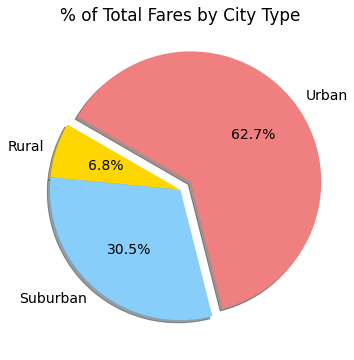

In [64]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()



## 5.6.1 Calculate Ride Percentages

In [66]:
ride_type_count = pyber_data_df.groupby('type').count()['ride_id'] 
total_ride = pyber_data_df['ride_id'].count()
type_percents =  ride_type_count / total_ride * 100
type_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

## 5.6.2 Pie Chart for Percentage of Rides by City Type

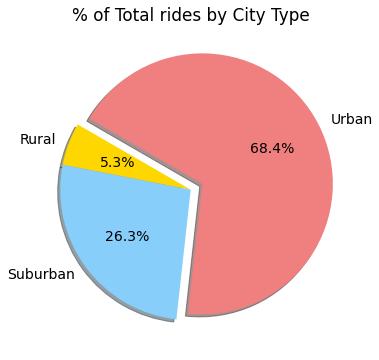

In [69]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

## 5.7.1 Calculate Driver Percentages

In [72]:
driver_type_count = pyber_data_df.groupby('type').sum()['driver_count']
total_driver_type = pyber_data_df['driver_count'].sum()
type_percents = driver_type_count / total_driver_type * 100  
type_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

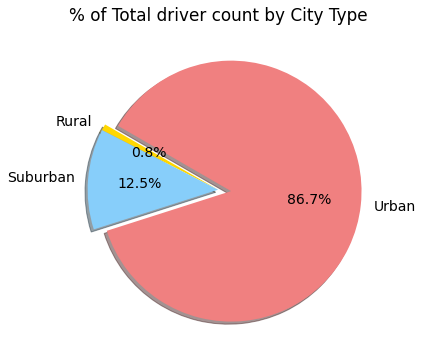

In [74]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total driver count by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()